# Assignment III

#                                       Hierarchical Clustering

Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds clusters by measuring the dissimilarities between data. Unsupervised learning means that a model does not have to be trained, and we do not need a "target" variable.

In [4]:
#Importing the modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

NumPy is a library for working with arrays and matricies in Python.

scikit-learn is a popular library for machine learning.



In [5]:
#Create arrays that resemble two variables in a dataset
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

In [6]:
#Turn the data into a set of points:
data = list(zip(x, y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


In [7]:
#Compute the linkage between all of the different points.
#Here we use a simple euclidean distance measure and Ward's linkage, which seeks to minimize the variance between clusters.
linkage_data = linkage(data, method='ward', metric='euclidean')

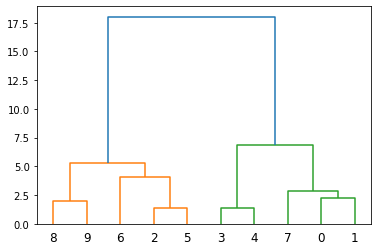

In [8]:
#plt.show() visualize the dendrogram instead of just the raw linkage data.

dendrogram(linkage_data)
plt.show()

In [9]:
#The scikit-learn library allows us to use hierarchichal clustering in a different manner.

# we initialize the AgglomerativeClustering class with 2 clusters, using the same euclidean distance and Ward linkage.

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [12]:
#The .fit_predict method can be called on  data to compute the clusters using the defined parameters across our chosen number of clusters.

labels = hierarchical_cluster.fit_predict(data) 
print(labels)

[0 0 1 0 0 1 1 0 1 1]


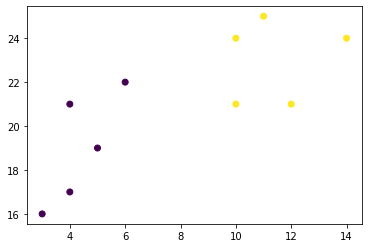

In [13]:
#plot the same data and color the points using the labels assigned to each index by the hierarchical clustering method
plt.scatter(x, y, c=labels)
plt.show()

# Text analysis using topic modeling algorithms

Topic Modeling in Python: Latent Dirichlet Allocation (LDA)

Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts.

In [15]:
import pandas as pd
import os


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
papers=pd.read_csv(r'C:\Users\VIKAS BHAMBHU\Downloads\papers.csv')

In [25]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [26]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
5183,2015,Bandits with Unobserved Confounders: A Causal ...,The Multi-Armed Bandit problem constitutes an ...,Bandits with Unobserved Confounders:\nA Causal...
7181,1994,Phase-Space Learning,Abstract Missing,Phase-Space Learning\n\nFu-Sheng Tsung\nChung ...
5117,2014,Flexible Transfer Learning under Support and M...,Transfer learning algorithms are used when one...,Flexible Transfer Learning under Support and M...
5948,2016,A Communication-Efficient Parallel Algorithm f...,Decision tree (and its extensions such as Grad...,A Communication-Efficient Parallel Algorithm f...
7201,1994,Recognizing Handwritten Digits Using Mixtures ...,Abstract Missing,Recognizing Handwritten Digits Using Mixtures ...


In [27]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))

In [28]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

5183    bandits with unobserved confounders:\na causal...
7181    phase-space learning\n\nfu-sheng tsung\nchung ...
5117    flexible transfer learning under support and m...
5948    a communication-efficient parallel algorithm f...
7201    recognizing handwritten digits using mixtures ...
Name: paper_text_processed, dtype: object

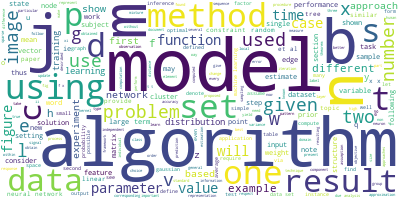

In [34]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [35]:
#Prepare text for LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\VIKAS
[nltk_data]     BHAMBHU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [37]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [38]:
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['bandits', 'unobserved', 'confounders', 'causal', 'approach', 'andrew', 'forney', 'department', 'computer', 'science', 'university', 'california', 'los', 'angeles', 'forns', 'csuclaedu', 'elias', 'bareinboim', 'department', 'computer', 'science', 'purdue', 'university', 'eb', 'purdueedu', 'judea', 'pearl', 'department', 'computer', 'science']


In [39]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 8), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [40]:
#LDA Model Training
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"learning" + 0.006*"model" + 0.005*"algorithm" + 0.005*"data" + '
  '0.004*"time" + 0.004*"models" + 0.004*"set" + 0.003*"one" + '
  '0.003*"function" + 0.003*"using"'),
 (1,
  '0.008*"data" + 0.008*"model" + 0.005*"algorithm" + 0.005*"learning" + '
  '0.004*"using" + 0.004*"number" + 0.004*"time" + 0.004*"models" + '
  '0.003*"training" + 0.003*"distribution"'),
 (2,
  '0.007*"learning" + 0.006*"model" + 0.006*"algorithm" + 0.005*"data" + '
  '0.004*"set" + 0.004*"one" + 0.004*"distribution" + 0.004*"time" + '
  '0.004*"figure" + 0.003*"using"'),
 (3,
  '0.007*"model" + 0.006*"data" + 0.005*"set" + 0.005*"learning" + '
  '0.005*"algorithm" + 0.005*"using" + 0.005*"function" + 0.004*"models" + '
  '0.004*"training" + 0.004*"time"'),
 (4,
  '0.007*"data" + 0.007*"model" + 0.006*"algorithm" + 0.005*"set" + '
  '0.004*"number" + 0.004*"using" + 0.004*"models" + 0.004*"learning" + '
  '0.003*"function" + 0.003*"two"'),
 (5,
  '0.006*"model" + 0.005*"learning" + 0.005*"using" 

In [49]:
pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
#import pyLDAvis.gensim
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
# Visualize the topics
#pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#/**
#if 1 == 1:
#    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
#    with open(LDAvis_data_filepath, 'wb') as f:
#        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath, 'rb') as f:
#    LDAvis_prepared = pickle.load(f)

#pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
#LDAvis_prepared

In [55]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

C:\Users\VIKAS BHAMBHU\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.003248  0.000049       1        1  27.667358
6     -0.001769  0.002396       2        1  21.796514
8     -0.003087 -0.000388       3        1  13.661079
1      0.004147  0.003507       4        1   8.341452
2     -0.005750  0.005592       5        1   7.732790
9     -0.001487 -0.008464       6        1   6.166756
7      0.007104  0.002692       7        1   5.391060
4     -0.000596 -0.002022       8        1   4.175363
5     -0.000423 -0.000913       9        1   2.896702
0      0.005108 -0.002447      10        1   2.170926, topic_info=            Term         Freq        Total Category  logprob  loglift
715        model  1580.000000  1580.000000  Default  30.0000  30.0000
642     learning  1210.000000  1210.000000  Default  29.0000  29.0000
286         data  1582.000000  1582.000000  Default  28.0000  28.0000
49     algorithm  1248.000000  1248.000000  Default  27.0000  27.0000
995          set  1117.000000  1117.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
51    algorithms    10.367095   508.196833  Topic10  -6.2377  -0.0622
1697    training    12.655483   837.711624  Topic10  -6.0383  -0.3626
461        first    10.047479   488.372942  Topic10  -6.2690  -0.0537
707       method    10.194255   535.200210  Topic10  -6.2545  -0.1308
1715        used    10.451020   611.996289  Topic10  -6.2296  -0.2400

[873 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
2284       1  0.317037  accelerated
2284       2  0.158518  accelerated
2284       3  0.118889  accelerated
2284       4  0.039630  accelerated
2284       5  0.079259  accelerated
...      ...       ...          ...
14569      5  0.058747          zrt
14569      6  0.117494          zrt
14569      7  0.058747          zrt
14569      8  0.117494          zrt
14569     10  0.058747          zrt

[3725 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 9, 2, 3, 10, 8, 5, 6, 1])